# НИР Лабораторная работа № 3

## Постановка задачи

- Найти преобразование Гильберта для сигнала $f(t)$ динамической системы из [лабораторной работы №1](https://github.com/AlexeyMakurin/Computer-technologies-in-physics/blob/main/RW_laboratory_work_1.ipynb);
- Визуализировать исходный сигнал и временную зависимоть мгновенной амплитуды колебания;
- Построить график мгновенной фазы колебаний. При наличии выреженного линейного тренда, также построить график мгновенной фазы колебаний с вычетом линейного вклада.

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

## Преобразование Гильберта

Для негармонической функции $f(t)$ сигнала можно ввести понятие мгновенной амплитуды $a(t)$, фазы $\varphi(t)$ и частоты $\omega(t)$.

И если перейти к комплексной форме записи сигнала

$$z(t) = f(t) + i\hat{f}(t) = a(t) e^{i\varphi(t)}, $$

то есть дополнить реальное колебание $f(t)$ произвольной мнимой частью $\hat{f}(t)$, тогда мгновенные амплитуда, фаза и частота определяются следующим образом

$$ a(t) = \sqrt{f^{2}(t) + \hat{f}^2(t)}, $$

$$ \varphi(t) = \arcsin \dfrac{\hat{f}}{a(t)}, $$

$$ \omega(t) = \dfrac{\dot{\hat{f}}(t) f(t) - \dot{f}(t) \hat{f}(t) }{a^2(t)}. $$

In [145]:
def amplitude(signal, gilbert):
    return np.sqrt(signal**2 + gilbert**2)

In [84]:
def phase(amplitude, gilbert):
    return np.arcsin(gilbert / amplitude)

Преобразование Гильберта для функции сигнала $f(t)$ определяется следующим образом

$$\hat{f}(t) = \dfrac{1}{\pi} \int\limits_{-\infty}^{\infty} \dfrac{f(\tau)}{t - \tau} d\tau.$$

Нахождение преобразования Гильберта через быстрое Фурье преобразование:

- По временому ряду $x(n) = x(n  \Delta t)$, $n = 1,...,N$ вычислить $X(f_k)$ c помощью процедуры БПФ;

- Вычислить Фурье-образ аналитического сигнала по формуле 

$$Z(f) = X(f) + i\hat{X}(f) = 
    \begin{cases}
     2X(f) ,f > 0,\\ 
     0 ,~~~~~~~~f < 0,\\
     X(0),~~f=0.
    \end{cases}$$
    
- Вычислить обратное БПФ от $Z(f_k)$, получив в результате аналитический сигнал $z(n)$;

- Выделить мнимую часть аналитического сигнала $z(n)$, которая является искомым преобразованием Гильберта: $\hat{x}(n) = Im[z(n)]$.

## Динамический сигнал

Рассмотрим динамический сигнал из [лабораторной работы №1](https://github.com/AlexeyMakurin/Computer-technologies-in-physics/blob/main/RW_laboratory_work_1.ipynb) на временном интервале от $[-100, 100]$ с шагом по времени $h = 0.001$.

Значения сигнала взяты из заранее подготовленного файла.

In [220]:
df_morris_lecar = pd.read_csv("morris-lecar.csv")
df_morris_lecar.head()

,Unnamed: 0,time,membrane potential,recovery variable,external current
0,0,-100.000,-52.140000,0.020000,-1.498135
1,1,-99.999,-52.140113,0.020000,0.256186
2,2,-99.998,-52.140052,0.020001,-3.063249
3,3,-99.997,-52.140321,0.020001,0.144474
4,4,-99.996,-52.140271,0.020002,-0.415389


In [221]:
times = df_morris_lecar["time"]
membrane_potential = df_morris_lecar["membrane potential"]
recovery_variable = df_morris_lecar["recovery variable"]
external_current = df_morris_lecar["external current"]

In [222]:
#fk = np.fft.fft(membrane_potential)
#n = len(membrane_potential)
#timestep = 0.001
#freq = np.fft.fftfreq(n, d=timestep)

In [223]:
def hilbert_from_scratch(u):
    # N : fft length
    # M : number of elements to zero out
    # U : DFT of u
    # v : IDFT of H(U)

    N = len(u)
    # take forward Fourier transform
    U = np.fft.fft(u)
    M = N - N//2 - 1
    # zero out negative frequency components
    U[N//2+1:] = [0] * M
    # double fft energy except @ DC0
    U[1:N//2] = 2 * U[1:N//2]
    # take inverse Fourier transform
    v = np.fft.ifft(U)
    return np.imag(v)

In [233]:
gilbert = hilbert_from_scratch(recovery_variable)
a = amplitude(recovery_variable, gilbert)
phi = phase(a, gilbert)

<IPython.core.display.Javascript object>


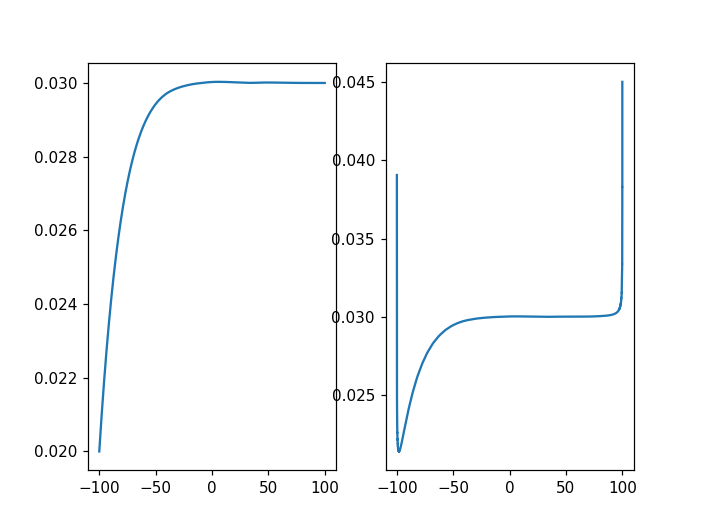

In [234]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(times, recovery_variable)
ax2.plot(times, a)

<IPython.core.display.Javascript object>


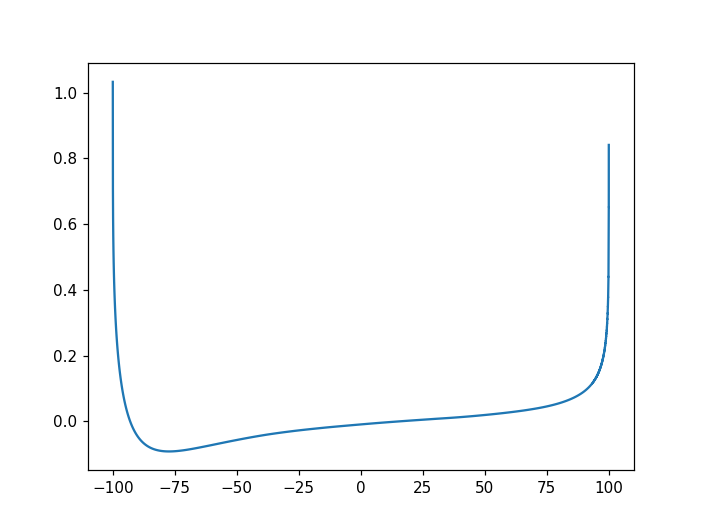

In [235]:
fig, ax = plt.subplots()
ax.plot(times, phi)